# Purpose
- goal is to use DLC-estimated key points and define behavioral epochs
- data is from Alex F from Knowles lab, and we want to quanitfy:

1. time in light box (time visible)
    - nose only
    - nose and ears
    - nose and ears and butt
2. distance to edge IN REAL COORDINATES
    - adjust marked coordinates to real coordinates (50cm2 box)
    - get animal position relative to corners
3. #, timing, location of rearing events
4. #, timing, location of jumps


In [1]:
# imports
import numpy as np
import pandas as pd
import glob, os, csv
import matplotlib.pyplot as plt

In [11]:
# load an example file
filename = "/home/dennislab2/Desktop/videos/skok_alex_videos/5DLC_resnet50_2022_Knowles_AlexOct13shuffle1_500000.csv"
df = pd.read_csv(filename,header=[1,2])
df

bodyparts      box_tl                              box_tr              \
         coords           x           y likelihood            x           y   
0             0  600.575623  141.166534   0.999926  1417.813110  146.198654   
1             1  600.653870  141.739182   0.999920  1417.510376  145.888626   
2             2  601.028015  141.864044   0.999900  1417.739380  145.986465   
3             3  600.710266  141.865433   0.999923  1417.394287  146.227692   
4             4  601.733398  142.436890   0.999883  1417.477783  146.626511   
...         ...         ...         ...        ...          ...         ...   
17969     17969  698.581726  189.737732   0.999886  1519.398804  178.036163   
17970     17970  698.699707  189.688950   0.999876  1519.541138  178.037872   
17971     17971  698.651367  189.868378   0.999853  1519.545654  178.007477   
17972     17972  698.689209  189.889374   0.999842  1519.403564  178.003250   
17973     17973  698.575134  189.794312   0.999882  1519.459961  178.141815   

                      box_bl                          ... paw_left_front  \
      likelihood           x            y likelihood  ...     likelihood   
0       0.999896  599.930908   963.720642   0.999816  ...       0.003097   
1       0.999871  600.273071   963.563293   0.999885  ...       0.002969   
2       0.999878  599.633789   963.442139   0.999852  ...       0.003193   
3       0.999874  599.766663   964.397156   0.999783  ...       0.004061   
4       0.999878  600.283203   963.613708   0.999855  ...       0.004815   
...          ...         ...          ...        ...  ...            ...   
17969   0.999831  692.969177  1006.179321   0.999672  ...       0.760865   
17970   0.999795  692.301025  1006.881348   0.999625  ...       0.853909   
17971   0.999801  692.366943  1006.928528   0.999730  ...       0.770654   
17972   0.999818  692.639587  1006.825500   0.999734  ...       0.548015   
17973   0.999858  692.984375  1005.576660   0.999609  ...       0.349669   

      paw_right_front                        paw_left_back              \
                    x           y likelihood             x           y   
0         1416.634644  953.704346   0.003026    599.411499  493.974457   
1          594.605652  955.166443   0.002901    599.251892  494.162750   
2          591.089905  969.911072   0.003280    599.420349  494.217773   
3          598.012634  601.100830   0.004063    599.233521  494.465210   
4          597.972168  599.684082   0.003776    599.319153  494.534576   
...               ...         ...        ...           ...         ...   
17969      937.939453  314.679871   0.770925    902.990417  359.494751   
17970      928.885803  312.539948   0.808792    899.551025  361.798157   
17971      920.332336  310.608978   0.822342    897.530823  363.673187   
17972      913.495972  306.482269   0.740434    895.799683  363.854156   
17973      902.113708  299.856262   0.542728    894.871643  362.002228   

                 paw_right_back                         
      likelihood              x           y likelihood  
0       0.003977    1417.489380  152.150040   0.006150  
1       0.004123    1423.055664  153.766418   0.006930  
2       0.004154    1423.182495  153.757614   0.007855  
3       0.004658     597.457642  609.455811   0.006398  
4       0.004616    1422.903687  154.051331   0.006106  
...          ...            ...         ...        ...  
17969   0.544118     943.644104  384.555450   0.954382  
17970   0.404393     943.479797  382.574219   0.952148  
17971   0.423555     941.696289  378.922821   0.864063  
17972   0.130281     942.752014  347.860657   0.463479  
17973   0.090921     942.171753  361.293945   0.439683  

[17974 rows x 46 columns]

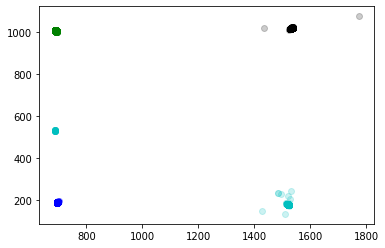

In [32]:
a=1790*7
b=1790*8
plt.scatter(df.box_tl["x"][a:b],df.box_tl["y"][a:b],c='b',alpha=0.2)
plt.scatter(df.box_tr["x"][a:b],df.box_tr["y"][a:b],c='c',alpha=0.2)
plt.scatter(df.box_bl["x"][a:b],df.box_bl["y"][a:b],c='g',alpha=0.2)
plt.scatter(df.box_br["x"][a:b],df.box_br["y"][a:b],c='k',alpha=0.2)
plt.show()

In [34]:
# know that 2:22 animal enters, there's a jump at ~2:27, 2:33, then exit 2:35, reenter
# so let's grab a subset around this time
start=round(((2*60)+22)*29.9)
end= start + round(29.9*13)

In [38]:
df_sub = df[start:end]
df_sub

bodyparts      box_tl                              box_tr              \
        coords           x           y likelihood            x           y   
4246      4246  610.216431  145.595718   0.999981  1426.649658  149.234283   
4247      4247  610.124390  145.322037   0.999981  1426.523193  149.413635   
4248      4248  610.096985  145.190140   0.999982  1426.444336  148.665009   
4249      4249  610.191956  145.259537   0.999985  1426.637573  149.360626   
4250      4250  610.020569  145.302185   0.999984  1426.453125  149.246216   
...        ...         ...         ...        ...          ...         ...   
4630      4630  610.135559  145.730942   0.999981  1428.888550  149.759186   
4631      4631  610.820190  146.188568   0.999988  1429.044312  149.638718   
4632      4632  609.467041  145.290817   0.999981  1428.584961  149.577499   
4633      4633  609.051941  145.309555   0.999975  1428.870605  149.595703   
4634      4634  609.655273  145.445190   0.999977  1429.179688  150.013992   

                     box_bl                         ... paw_left_front  \
     likelihood           x           y likelihood  ...     likelihood   
4246   0.999991  609.665649  967.411072   0.999730  ...       0.003389   
4247   0.999992  609.704041  968.166138   0.999649  ...       0.002549   
4248   0.999991  609.348450  966.920532   0.999791  ...       0.003267   
4249   0.999992  609.929749  967.986084   0.999698  ...       0.002712   
4250   0.999992  609.729614  968.034546   0.999652  ...       0.003128   
...         ...         ...         ...        ...  ...            ...   
4630   0.999994  609.063782  968.864197   0.999481  ...       0.108929   
4631   0.999994  610.543884  968.965698   0.999772  ...       0.075764   
4632   0.999993  610.611145  968.671875   0.999598  ...       0.189294   
4633   0.999994  609.354431  967.783203   0.999615  ...       0.092593   
4634   0.999993  609.663818  967.982544   0.999692  ...       0.185309   

     paw_right_front                        paw_left_back              \
                   x           y likelihood             x           y   
4246     1431.553101  957.874023   0.003531    604.736023  494.404022   
4247      615.841248  497.267944   0.002726    604.689575  494.450592   
4248     1431.459229  957.424133   0.003648    604.527954  494.462891   
4249      615.775696  497.412659   0.003582    606.873291  495.597656   
4250      615.849121  497.270996   0.004418    607.254517  495.430969   
...              ...         ...        ...           ...         ...   
4630     1045.405884  258.999268   0.956542    954.089600  318.124115   
4631     1018.691101  278.134583   0.977679   1000.872681  284.414612   
4632      997.855835  290.957031   0.988147    976.690674  299.037140   
4633      970.690308  308.686737   0.910735    875.990417  368.584229   
4634      940.805054  323.089417   0.921479    923.837952  330.143188   

                paw_right_back                         
     likelihood              x           y likelihood  
4246   0.008194     612.017212  609.927246   0.007378  
4247   0.008802     612.072998  609.812927   0.007191  
4248   0.008657     611.940369  609.941528   0.006400  
4249   0.010329     612.169006  609.882996   0.007293  
4250   0.010642     616.649597  492.181458   0.008306  
...         ...            ...         ...        ...  
4630   0.043935    1055.249023  255.210358   0.168778  
4631   0.243540    1007.651794  328.683441   0.591629  
4632   0.180363     992.208435  290.964600   0.272337  
4633   0.110227     979.121399  302.934326   0.215743  
4634   0.191556     948.685791  319.167450   0.213996  

[389 rows x 46 columns]

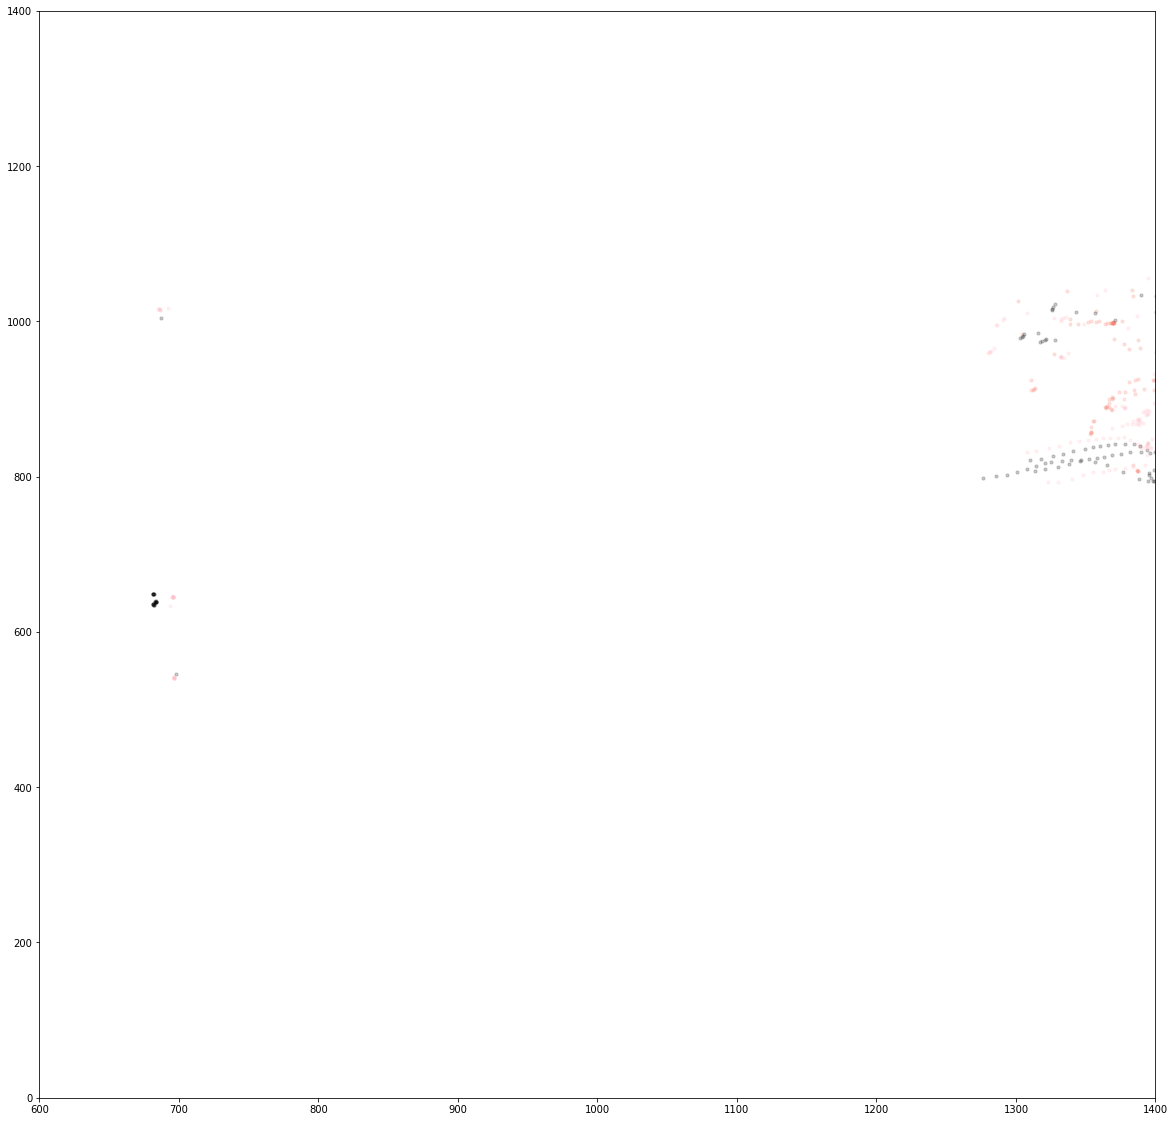

In [91]:
a=.2
sz=10
df_sub = jumps.copy()
plt.figure(figsize=(20,20))
plt.scatter(df_sub.tail_base["x"],df_sub.tail_base["y"],c='salmon',alpha=a,s=sz)
plt.scatter(df_sub.tail_tip["x"],df_sub.tail_tip["y"],c='salmon',alpha=a,s=sz)
plt.scatter(df_sub.ear_left["x"],df_sub.ear_left["y"],c='k',alpha=a,s=sz)
plt.scatter(df_sub.ear_right["x"],df_sub.ear_right["y"],c='k',alpha=a,s=sz)
plt.scatter(df_sub.nose["x"],df_sub.nose["y"],c='k',alpha=a,s=sz)

plt.scatter(df_sub.paw_left_back["x"],df_sub.paw_left_back["y"],c='pink',alpha=a,s=sz)
plt.scatter(df_sub.paw_left_front["x"],df_sub.paw_left_front["y"],c='pink',alpha=a,s=sz)
plt.scatter(df_sub.paw_right_back["x"],df_sub.paw_right_back["y"],c='pink',alpha=a,s=sz)
plt.scatter(df_sub.paw_right_front["x"],df_sub.paw_right_front["y"],c='pink',alpha=a,s=sz)
plt.xlim(600,1400)
plt.ylim(0,1400)
plt.show()

# todo
- add likelihood thresholds
- smooth somehow the box info
- affine transform to box coordinates
- how much time spent 5cm from walls?
- find rear example, plot, how diff from jumps?

In [90]:
#7:41 enter
# 7:48 rearing off and on till 7:53
# jumps 758, 802 804 805  
# 809 out

start = round(((60*7)+41)*29.9)
end = round(start+(29*29.9))
df_r = df[start:end]
df_r
rear = df_r[(30*7):(30*12)]
jumps = df_r[(30*21):(30*26)]

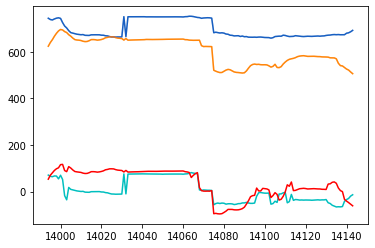

In [137]:
x1=rear['nose','x'][rear.nose["likelihood"]>0.05]
y1=rear['nose','y'][rear.nose["likelihood"]>0.05]
x2=rear['tail_base','x'][rear.nose["likelihood"]>0.05]
y2=rear['tail_base','y'][rear.nose["likelihood"]>0.05]

plt.plot(x1)
plt.plot(y1)
plt.plot(rear['nose','x'],c='b',alpha=0.2)
plt.plot(rear['nose','y'],c='orange',alpha=0.2)
plt.plot((x1-x2),'c')
plt.plot((y1-y2),'r')
#plt.ylim(-100,800)
#plt.xlim(14420,14500)
plt.show()

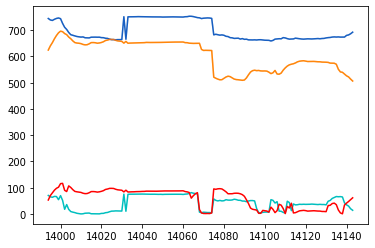

In [138]:
x1=rear['nose','x'][rear.nose["likelihood"]>0.05]
y1=rear['nose','y'][rear.nose["likelihood"]>0.05]
x2=rear['tail_base','x'][rear.nose["likelihood"]>0.05]
y2=rear['tail_base','y'][rear.nose["likelihood"]>0.05]

plt.plot(x1)
plt.plot(y1)
plt.plot(rear['nose','x'],c='b',alpha=0.2)
plt.plot(rear['nose','y'],c='orange',alpha=0.2)
plt.plot(abs(x1-x2),'c')
plt.plot(abs(y1-y2),'r')
#plt.ylim(-100,800)
#plt.xlim(14420,14500)
plt.show()

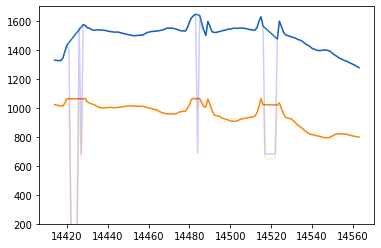

In [110]:
plt.plot(jumps['nose','x'][jumps.nose["likelihood"]>0.05])
plt.plot(jumps['nose','y'][jumps.nose["likelihood"]>0.05])
plt.plot(jumps['nose','x'],c='b',alpha=0.2)
plt.plot(jumps['nose','y'],c='orange',alpha=0.2)
plt.ylim(200,1700)
plt.show()

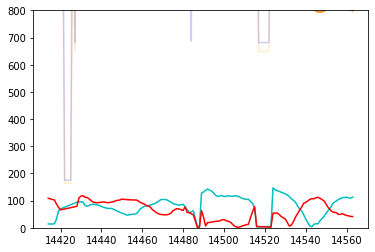

In [139]:
x1=jumps['nose','x'][jumps.nose["likelihood"]>0.05]
y1=jumps['nose','y'][jumps.nose["likelihood"]>0.05]
x2=jumps['tail_base','x'][jumps.nose["likelihood"]>0.05]
y2=jumps['tail_base','y'][jumps.nose["likelihood"]>0.05]

plt.plot(x1)
plt.plot(y1)
plt.plot(jumps['nose','x'],c='b',alpha=0.2)
plt.plot(jumps['nose','y'],c='orange',alpha=0.2)
plt.plot(abs(x1-x2),'c')
plt.plot(abs(y1-y2),'r')
plt.ylim(-0,800)
#plt.xlim(14420,14500)
plt.show()

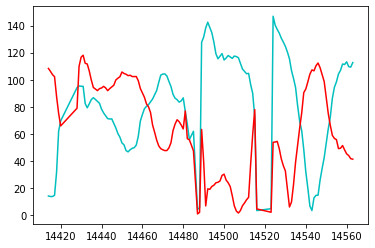

In [93]:
jumps

bodyparts      box_tl                              box_tr              \
         coords           x           y likelihood            x           y   
14414     14414  695.812317  187.108459   0.999945  1523.466431  173.947571   
14415     14415  695.813293  187.139450   0.999943  1523.158081  173.928833   
14416     14416  695.647827  187.032120   0.999944  1522.795166  174.014771   
14417     14417  695.657043  187.013351   0.999944  1522.770874  174.035934   
14418     14418  695.564514  186.936691   0.999945  1522.789551  174.033386   
...         ...         ...         ...        ...          ...         ...   
14559     14559  695.569641  187.144638   0.999949  1521.431519  173.162766   
14560     14560  695.564392  187.129623   0.999951  1521.452026  173.227951   
14561     14561  695.554688  187.108871   0.999950  1521.297729  173.179871   
14562     14562  695.585327  187.044632   0.999955  1521.245728  173.186676   
14563     14563  695.541809  187.042343   0.999954  1521.283325  173.226257   

                      box_bl                          ... paw_left_front  \
      likelihood           x            y likelihood  ...     likelihood   
14414   0.999809  689.237976  1008.845276   0.999748  ...       0.957100   
14415   0.999829  689.258789  1008.972168   0.999708  ...       0.942132   
14416   0.999848  688.534363  1009.246765   0.999754  ...       0.962431   
14417   0.999856  688.499023  1009.652466   0.999746  ...       0.972180   
14418   0.999845  688.775085  1009.687866   0.999811  ...       0.954160   
...          ...         ...          ...        ...  ...            ...   
14559   0.999884  688.262207  1009.232300   0.999794  ...       0.060139   
14560   0.999888  688.335571  1009.160889   0.999782  ...       0.059998   
14561   0.999892  688.401489  1009.398376   0.999785  ...       0.078919   
14562   0.999885  688.422791  1009.202515   0.999715  ...       0.098728   
14563   0.999889  688.263062  1009.921631   0.999708  ...       0.071087   

      paw_right_front                         paw_left_back              \
                    x            y likelihood             x           y   
14414     1291.642700  1004.288330   0.439628   1332.232544  955.016052   
14415     1291.051147  1002.178162   0.595703   1331.978271  954.518921   
14416     1286.415771   995.136841   0.420695   1332.184692  954.141418   
14417     1285.972656   995.612000   0.605019   1331.896851  953.417969   
14418     1307.567505  1010.263977   0.668995   1334.335938  953.012268   
...               ...          ...        ...           ...         ...   
14559     1355.019653   806.219360   0.079417   1386.585449  873.007751   
14560     1348.211670   801.654785   0.061233   1384.107910  871.566162   
14561     1340.358398   797.478271   0.059882   1405.585571  843.738708   
14562     1330.441650   793.078613   0.071812   1368.820435  862.733215   
14563     1323.226196   792.456360   0.137728   1389.134766  838.082764   

                 paw_right_back                         
      likelihood              x           y likelihood  
14414   0.972809    1282.006104  961.062012   0.993330  
14415   0.965880    1281.311157  960.630737   0.989978  
14416   0.962669    1280.643555  959.996643   0.983213  
14417   0.967591    1279.761230  959.313171   0.974487  
14418   0.821046    1284.409302  965.228699   0.976006  
...          ...            ...         ...        ...  
14559   0.316435    1422.543335  834.873413   0.062043  
14560   0.071648    1406.489868  880.588867   0.081789  
14561   0.015361    1408.885742  835.659729   0.049747  
14562   0.026449    1401.225098  827.756470   0.029573  
14563   0.025631    1393.901001  828.264587   0.021878  

[150 rows x 46 columns]